# 📌 **Extracción**

Extracción de datos

Descripción

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

¿Qué debes hacer?

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [3]:
import pandas as pd
import logging

# Configurar logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

def cargar_dataframe_desde_json(url):
    """
    Carga un DataFrame desde un archivo JSON ubicado en una URL.
    """
    try:
        df = pd.read_json(url)
        logging.info(f"DataFrame cargado exitosamente. Filas: {len(df)}, Columnas: {len(df.columns)}")
        return df
    except Exception as e:
        logging.error(f"No se pudo cargar el DataFrame: {e}")
        return None

# URL del JSON
raw_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Cargar datos
df = cargar_dataframe_desde_json(raw_url)

#🔧 Transformación
Conozce el conjunto de datos

Descripción

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [4]:
import pandas as pd
import logging

def explorar_dataframe(df, n_filas=5):
    """
    Muestra una exploración básica del DataFrame:
    - Lista de columnas
    - Dimensiones
    - Primeras filas
    - Información de tipos de datos
    """
    # Configuración local de pandas
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)

    logging.info("Exploración del DataFrame")

    logging.info(f"Dimensiones -> Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
    logging.info(f"Columnas: {df.columns.tolist()}")

    print("\n" + "="*50 + "\n")
    logging.info("Primeras filas:")
    print(df.head(n_filas))

    print("\n" + "="*50 + "\n")
    logging.info("Tipos de datos y valores nulos:")
    print(df.info())

# Ejemplo de uso:
explorar_dataframe(df)




   customerID Churn                                                                                      customer                                            phone                                                                                                                                                                           internet                                                                                                                                           account
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}   {'PhoneService': 'Yes', 'MultipleLines': 'No'}           {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}              {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}
1  0003-MKNFE    No   

###Diccionario de datos

* customerID: número de identificación
único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* Tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

####Columnas mas importantes

* Churn
* Internet
* Account


##Comprabacion de datos nulos

En esta etapa se revisa la calidad de los datos para identificar posibles inconvenientes que puedan distorsionar el análisis. Es importante detectar valores faltantes, registros duplicados, formatos incorrectos o categorías inconsistentes. Este paso resulta fundamental para garantizar que la información esté depurada y lista para avanzar a fases posteriores.

In [37]:
COLUMNAS_CHECK = ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

print("1. Verificación de valores ausentes:")

# Calcular nulos
nulos = df[COLUMNAS_CHECK].isnull().sum()

# Mostrar resultados de manera clara
if nulos.sum() == 0:
    print("✅ No se encontraron valores ausentes en las columnas seleccionadas")
else:
    print(nulos[nulos > 0])

print("\n" + "="*50 + "\n")

1. Verificación de valores ausentes:
✅ No se encontraron valores ausentes en las columnas seleccionadas




In [38]:
COLUMNAS_DUPLICADOS = ['customerID', 'Churn']

print("2. Verificación de valores duplicados:")

# Contar duplicados
duplicados = df[COLUMNAS_DUPLICADOS].duplicated().sum()

# Mostrar resultado de manera clara
if duplicados == 0:
    print("✅ No se encontraron registros duplicados en las columnas seleccionadas")
else:
    print(f"⚠️ Se encontraron {duplicados} registros duplicados en las columnas seleccionadas")

print("\n" + "="*50 + "\n")

# Nota:
# La función .duplicated() no puede procesar directamente columnas que contienen diccionarios
# (como 'customer', 'phone', 'internet', 'account') sin causar un error.
# Para un chequeo completo de duplicados en todas las columnas, primero se necesitaría
# normalizar o desanidar estas columnas complejas.

2. Verificación de valores duplicados:
✅ No se encontraron registros duplicados en las columnas seleccionadas




In [39]:
COLUMNAS_FORMATO = ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

print("3. Verificación de valores con errores de formato:")

# Mostrar tipos de datos de manera clara
tipos = df[COLUMNAS_FORMATO].dtypes
for col, tipo in tipos.items():
    print(f"{col}: {tipo}")

print("\n" + "="*50 + "\n")

# Nota:
# Esto proporciona una visión general de los tipos de datos.
# Los errores de formato más específicos dentro de los datos anidados
# (como diccionarios en 'customer', 'phone', 'internet', 'account')
# se podrán detectar mejor después de la normalización.

3. Verificación de valores con errores de formato:
customerID: object
Churn: object
customer: object
phone: object
internet: object
account: object




In [40]:
COLUMNA_CATEGORICA = 'Churn'

print("4. Verificación de valores con inconsistencias en las categorías:")

# Obtener valores únicos
valores_unicos = df[COLUMNA_CATEGORICA].unique()
print(f"Valores únicos en '{COLUMNA_CATEGORICA}': {valores_unicos}")

print("\n" + "="*50 + "\n")

# Nota:
# El método .unique() funciona sobre una columna (Serie de Pandas) y es útil para detectar
# inconsistencias en categorías. No se recomienda usarlo directamente sobre columnas que contienen
# diccionarios ('customer', 'phone', 'internet', 'account'), ya que puede no reflejar
# correctamente las categorías internas. La revisión de estas columnas se realiza
# mejor después de normalizar o desanidar los datos.

4. Verificación de valores con inconsistencias en las categorías:
Valores únicos en 'Churn': ['No' 'Yes' '']




Ahora que se han detectado las inconsistencias, es momento de corregir los datos. Realiza los ajustes necesarios para que la información esté completa, consistente y coherente, asegurando que el dataset esté listo para avanzar a las siguientes fases del análisis.

In [41]:
# Detectar filas con valores vacíos en 'Churn' (incluyendo espacios en blanco)
filas_problema = df['Churn'].str.strip() == ''
cantidad_problemas = filas_problema.sum()
print(f"Se encontraron {cantidad_problemas} filas con valores vacíos en la columna 'Churn'.")

# Crear un nuevo DataFrame excluyendo esas filas
df_limpio = df[~filas_problema].copy()
print("Se eliminaron las filas problemáticas.")

# Verificación del DataFrame limpio
print("\nVerificación en el DataFrame 'df_limpio':")
print(f"Tamaño original: {df.shape[0]} filas | Tamaño limpio: {df_limpio.shape[0]} filas")
print("Valores únicos en 'Churn' después de la limpieza:")
print(df_limpio['Churn'].unique())
print("\n" + "="*50 + "\n")

Se encontraron 224 filas con valores vacíos en la columna 'Churn'.
Se eliminaron las filas problemáticas.

Verificación en el DataFrame 'df_limpio':
Tamaño original: 7267 filas | Tamaño limpio: 7043 filas
Valores únicos en 'Churn' después de la limpieza:
['No' 'Yes']




Con los datos depurados, vamos a crear la columna “Cuentas_Diarias”. Esta columna se obtiene a partir del cobro mensual, calculando el equivalente diario para cada cliente, lo que permite analizar su comportamiento de manera más detallada y temporal.

In [44]:
import ast  # Para convertir strings en diccionarios

# Convertir la columna 'account' de string a diccionario
df_limpio['account_dict'] = df_limpio['account'].apply(lambda x: ast.literal_eval(x))

# Crear la columna 'Cuentas_Diarias' dividiendo el cobro mensual entre 30
df_limpio['Cuentas_Diarias'] = df_limpio['account_dict'].apply(lambda x: x['Charges']['Monthly'] / 30)

# Verificación de la nueva columna
print("Se ha creado la columna 'Cuentas_Diarias'.\n")
pd.set_option('display.max_colwidth', None)
print(df_limpio[['customerID', 'account', 'Cuentas_Diarias']].head())
print("\n" + "="*50 + "\n")


Se ha creado la columna 'Cuentas_Diarias'.

   customerID                                                                                                                                           account  Cuentas_Diarias
0  0002-ORFBO              {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}         2.186667
1  0003-MKNFE         {'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}         1.996667
2  0004-TLHLJ   {'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 73.9, 'Total': '280.85'}}         2.463333
3  0011-IGKFF  {'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 98.0, 'Total': '1237.85'}}         3.266667
4  0013-EXCHZ        {'Contract': 'Month-to-month', 'PaperlessBilling':

#📊 Carga y análisis

###Análisis Descriptivo – Explicación

Para iniciar, vamos a examinar nuestros datos de manera resumida, calculando estadísticas como el promedio, el valor central (mediana), la dispersión (desviación estándar) y otras medidas que nos permitan entender cómo se comportan y se distribuyen los datos de los clientes.

En otras palabras, este paso nos ayuda a observar patrones generales, detectar tendencias y tener una visión clara de la información antes de profundizar en análisis más complejos.

In [45]:
# Análisis descriptivo general para todas las columnas numéricas
print("Análisis descriptivo general de columnas numéricas:\n")
print(df_limpio.describe())
print("\n" + "="*50 + "\n")

# Análisis descriptivo adicional para columnas categóricas (como 'Churn')
print("Distribución de valores en columnas categóricas:\n")
columnas_categoricas = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in columnas_categoricas:
    if col in df_limpio.columns:
        print(f"{col}:\n{df_limpio[col].value_counts()}\n")
print("\n" + "="*50 + "\n")

# Métricas adicionales si quieres calcular manualmente
print("Métricas adicionales para 'Cuentas_Diarias':")
print(f"Media: {df_limpio['Cuentas_Diarias'].mean():.2f}")
print(f"Mediana: {df_limpio['Cuentas_Diarias'].median():.2f}")
print(f"Desviación estándar: {df_limpio['Cuentas_Diarias'].std():.2f}")
print(f"Mínimo: {df_limpio['Cuentas_Diarias'].min():.2f}")
print(f"Máximo: {df_limpio['Cuentas_Diarias'].max():.2f}")


Análisis descriptivo general de columnas numéricas:

       Cuentas_Diarias
count      7043.000000
mean          2.158723
std           1.003002
min           0.608333
25%           1.183333
50%           2.345000
75%           2.995000
max           3.958333


Distribución de valores en columnas categóricas:

Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64



Métricas adicionales para 'Cuentas_Diarias':
Media: 2.16
Mediana: 2.34
Desviación estándar: 1.00
Mínimo: 0.61
Máximo: 3.96


###Distribución de la evasión – Explicación

El objetivo de este paso es analizar cómo se reparte la variable “Churn” entre los clientes. Queremos ver cuántos clientes se quedaron y cuántos se dieron de baja. Para lograrlo, es útil utilizar gráficos visuales, como diagramas de barras o pastel, que permitan observar de manera clara las proporciones de evasión y permanencia.

En otras palabras, este análisis nos ayuda a visualizar de un vistazo la frecuencia de clientes que abandonan frente a los que se mantienen, lo que es fundamental antes de profundizar en predicciones o segmentaciones.

/tmp/ipython-input-3062711844.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_churn.index, y=conteo_churn.values, palette=palette, ax=axes[0])
/tmp/ipython-input-3062711844.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=conteo_churn.index, y=conteo_churn.values, palette=palette, ax=axes[0])


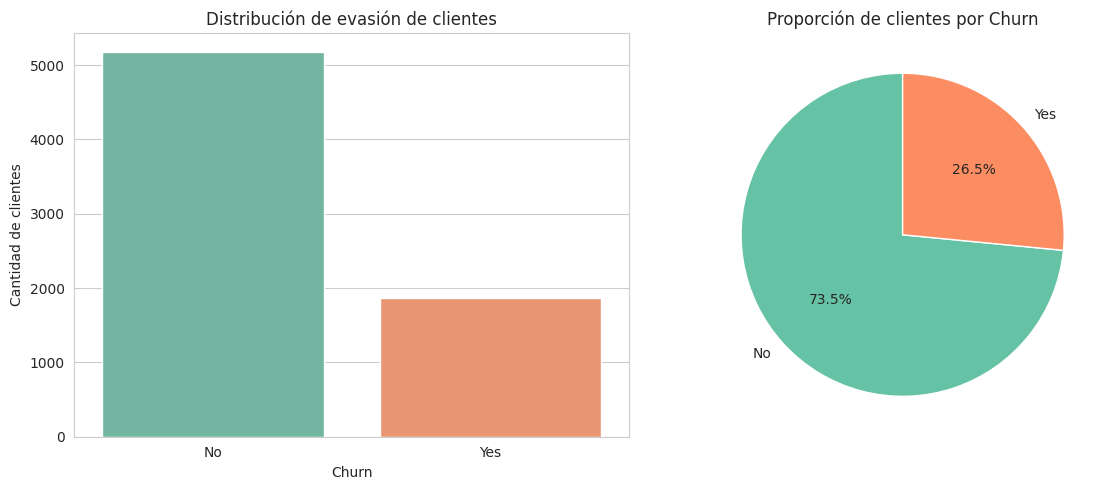

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

# Contar la cantidad de clientes por Churn
conteo_churn = df_limpio['Churn'].value_counts()

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Gráfico de barras
sns.barplot(x=conteo_churn.index, y=conteo_churn.values, palette=palette, ax=axes[0])
axes[0].set_title("Distribución de evasión de clientes")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Cantidad de clientes")

# Gráfico de pastel
axes[1].pie(conteo_churn.values, labels=conteo_churn.index, autopct="%1.1f%%", colors=palette, startangle=90)
axes[1].set_title("Proporción de clientes por Churn")

plt.tight_layout()
plt.show()


###Recuento de evasión según variables categóricas – Explicación

En este paso, vamos a analizar cómo se relaciona la evasión (“Churn”) con otras variables categóricas del dataset, como:

* Género (gender)

* Tipo de contrato (Contract)

* Método de pago (PaymentMethod)

* Otros servicios contratados

El objetivo es identificar patrones o tendencias, por ejemplo, si ciertos tipos de clientes tienen más probabilidades de abandonar el servicio. Esto es útil para tomar decisiones estratégicas y diseñar acciones para reducir la evasión.

En otras palabras, este análisis nos permite ver qué características de los clientes están asociadas con mayor o menor churn, ayudando a enfocar esfuerzos de retención.

In [55]:

import ast

# Convertir string a diccionario (si aplica)
df_limpio['customer_dict'] = df_limpio['customer'].apply(lambda x: ast.literal_eval(x))

# Extraer el género a una columna nueva
df_limpio['gender'] = df_limpio['customer_dict'].apply(lambda x: x['gender'])


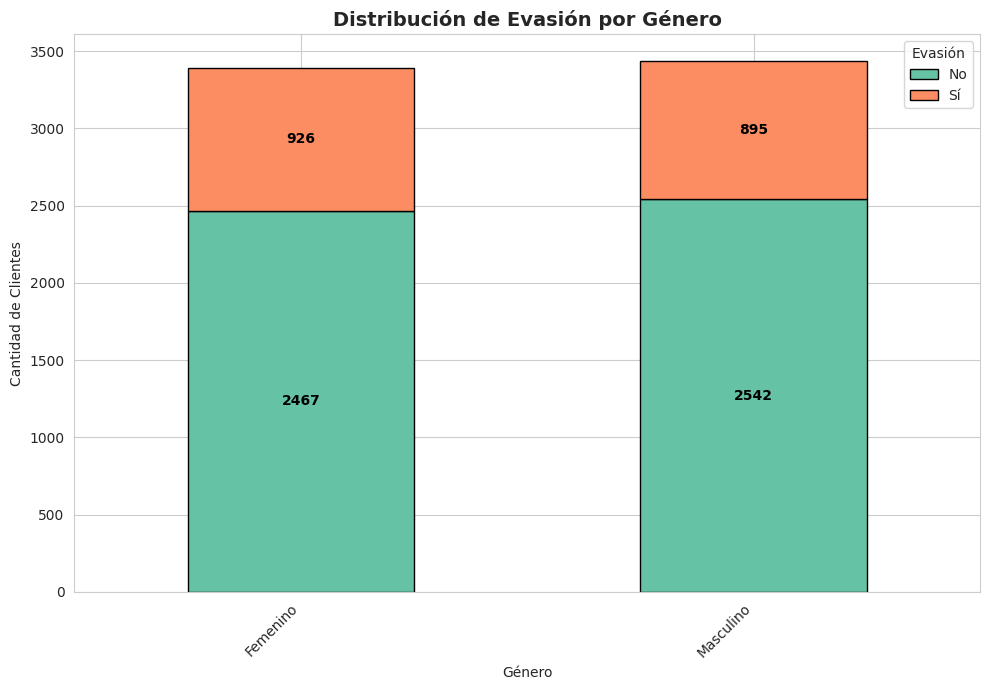

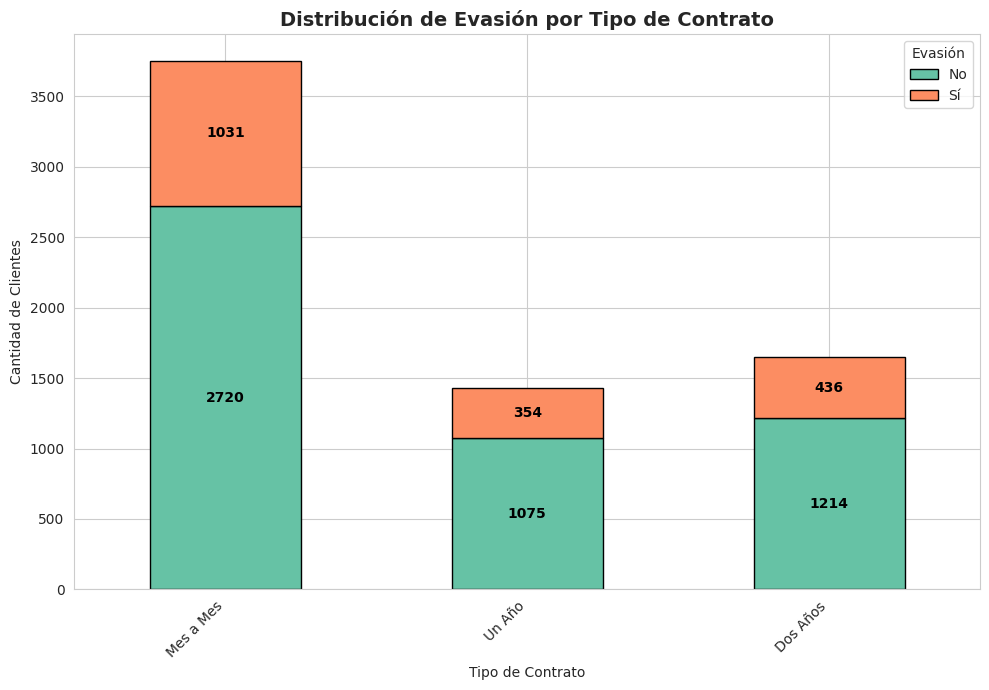

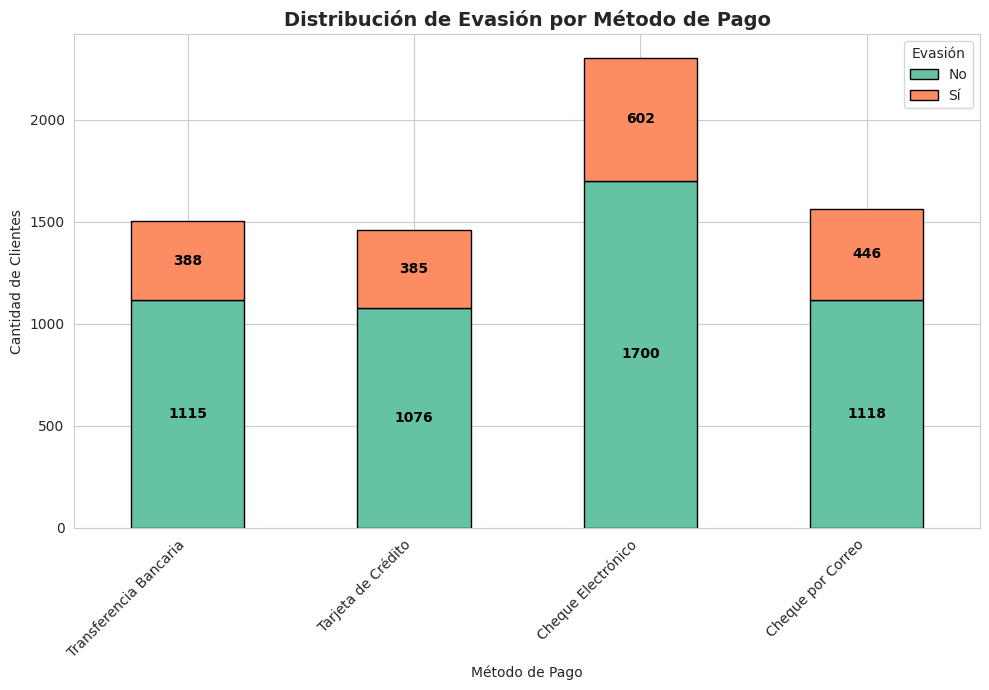

In [64]:
import seaborn as sns

# Estilo y paleta
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

#---Análisis y Visualización de Evasión por Categoría---

traducciones = {
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a Mes',
    'One year': 'Un Año',
    'Two year': 'Dos Años',
    'Electronic check': 'Cheque Electrónico',
    'Mailed check': 'Cheque por Correo',
    'Bank transfer (automatic)': 'Transferencia Bancaria',
    'Credit card (automatic)': 'Tarjeta de Crédito'
}

variables_a_analizar = ['gender', 'Contract', 'PaymentMethod']
nombres_en_espanol = ['Género', 'Tipo de Contrato', 'Método de Pago']

for i, variable in enumerate(variables_a_analizar):

    # Tabla de contingencia
    crosstab = pd.crosstab(df_final[variable], df_final['Evasion'])
    crosstab.rename(index=traducciones, inplace=True)

    # Gráfico con paleta Set2
    ax = crosstab.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 7),
        color=palette[:2],  # solo 2 colores de Set2
        edgecolor='black'
    )

    # Etiquetas con números dentro de cada barra
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', color='black', fontweight='bold')

    # Configuración estética
    plt.title(f'Distribución de Evasión por {nombres_en_espanol[i]}', fontsize=14, fontweight='bold')
    plt.ylabel('Cantidad de Clientes')
    plt.xlabel(nombres_en_espanol[i])
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Evasión', labels=['No', 'Sí'])

    plt.tight_layout()
    plt.show()



##Conteo de evasión por variables numéricas

####Descripción

En este paso se analizan las principales variables numéricas del conjunto de datos (por ejemplo, cargos totales o meses de antigüedad) para observar cómo se comportan en los clientes que se dieron de baja frente a los que permanecieron en la empresa.

La idea es identificar patrones: por ejemplo, si las personas con mayor gasto acumulado o con más tiempo de contrato tienen menos probabilidad de cancelar, o si por el contrario, ciertos rangos de valores están más relacionados con la evasión.

Este análisis ofrece pistas valiosas para detectar qué factores cuantitativos influyen con mayor fuerza en la decisión de abandonar el servicio.

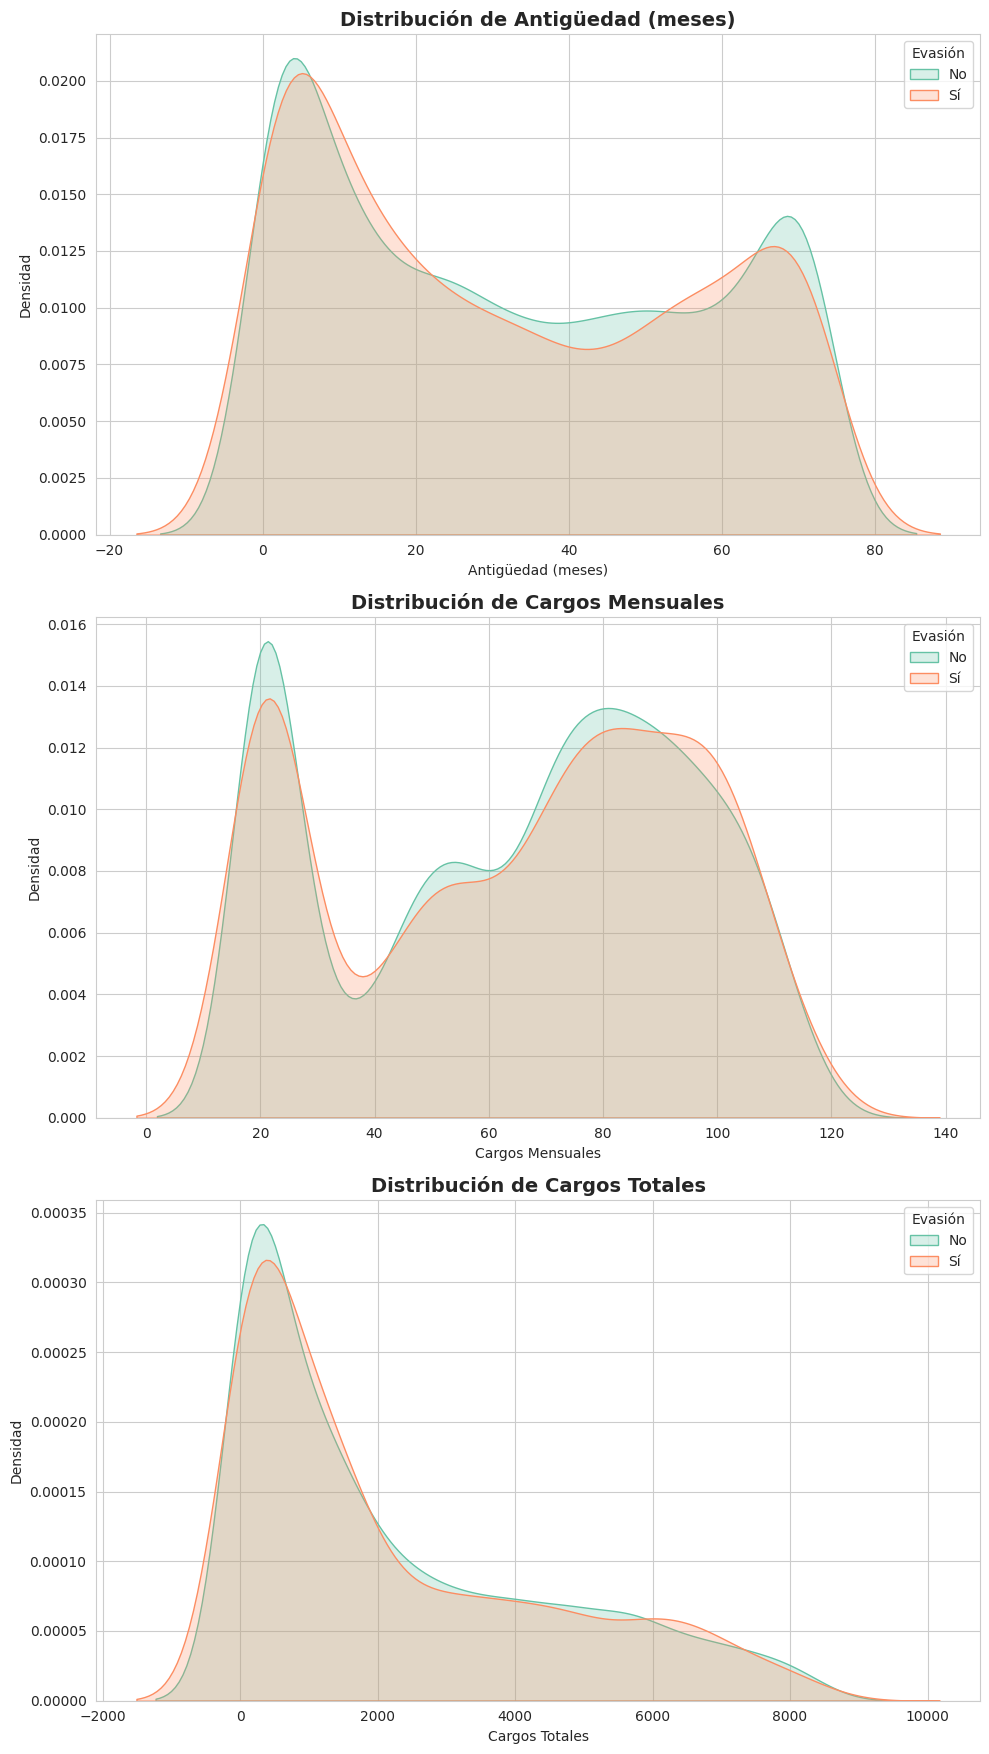

In [66]:

import ast  # Para convertir string en diccionario de forma segura

# --- Visualización de variables numéricas con paleta Set2 ---
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

variables_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
nombres_en_espanol_num = ['Antigüedad (meses)', 'Cargos Mensuales', 'Cargos Totales']

fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=1, figsize=(10, 6 * len(variables_numericas)))

for i, variable in enumerate(variables_numericas):
    ax = axes[i]

    # Usamos los dos primeros colores de Set2 (verde y naranja por defecto)
    sns.kdeplot(df_final[df_final['Evasion'] == 0][variable],
                label='No', fill=True, color=palette[0], ax=ax)
    sns.kdeplot(df_final[df_final['Evasion'] == 1][variable],
                label='Sí', fill=True, color=palette[1], ax=ax)

    ax.set_title(f'Distribución de {nombres_en_espanol_num[i]}', fontsize=14, fontweight='bold')
    ax.set_xlabel(nombres_en_espanol_num[i])
    ax.set_ylabel('Densidad')
    ax.legend(title='Evasión')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()



#Informe Final: Análisis de Evasión de Clientes en Telecom X
###Introducción

###Propósito del Estudio

Este informe presenta el análisis realizado sobre la base de clientes de Telecom X, una compañía ficticia de telecomunicaciones en América Latina. El objetivo central fue identificar los factores que más influyen en la pérdida de clientes (churn) y, a partir de esos hallazgos, diseñar estrategias de retención que ayuden a mejorar la fidelización.

###La Relevancia del Problema

La evasión de clientes es un desafío clave en el sector de telecomunicaciones, caracterizado por la alta competencia y la necesidad constante de mantener ingresos recurrentes. Cada cliente perdido no solo significa menores ventas, sino también un aumento de costos por la captación de nuevos usuarios. Comprender qué motiva a los clientes a cancelar sus servicios es el primer paso para implementar planes de lealtad y estrategias proactivas que fortalezcan la relación a largo plazo.

Este análisis exploratorio de datos (EDA) busca sentar las bases para proyectos futuros, como el desarrollo de modelos predictivos que permitan anticipar qué clientes presentan mayor riesgo de abandono.

###Preparación de los Datos
###📌 Extracción

Los datos se obtuvieron a través de una API que entregaba la información en formato JSON.
Mediante pandas en Python, los registros se cargaron en un DataFrame, lo que permitió trabajar con una estructura tabular.
El dataset inicial contenía 7267 registros y 6 columnas, con información sobre clientes, estado de evasión, servicios contratados y detalles de cuenta.

######🔧 Transformación

Una vez cargados los datos, se llevó a cabo un proceso de limpieza y estandarización:

* Exploración inicial:

Se detectó que varias columnas (customer, phone, internet, account) contenían información en forma de diccionarios anidados.

* Revisión de calidad:

  * Valores faltantes: no se encontraron nulos.

  * Duplicados: no hubo filas repetidas por customerID y churn.

  * Inconsistencias: se detectaron 224 registros con Churn vacío, los cuales fueron eliminados, quedando 7043 filas válidas.

* Transformaciones clave:

   * Se creó la variable Cuentas_Diarias (cargos mensuales / 30).

   * La variable Churn se convirtió a formato binario (1 = Sí, 0 = No).

  * Las columnas fueron renombradas al español.

  * Los campos anidados se expandieron con pd.json_normalize, obteniendo un df_final listo para el análisis.

##Análisis Exploratorio de Datos
###📊 Estadísticas Generales

Se calcularon medidas descriptivas para las variables numéricas (media, mediana, desviación estándar).
La tasa general de evasión fue de 26.5%.

###Distribución de la Evasión

* Clientes que permanecieron: 5174 (73.5%)

* Clientes que cancelaron: 1869 (26.5%)

Este desbalance refleja la magnitud del problema.

###Evasión y Variables Categóricas

* Género: hombres y mujeres presentan tasas similares, por lo que no es un factor determinante.

* *Tipo de Contrato: los contratos mes a mes registran la tasa más alta de evasión frente a los contratos anuales o bianuales.

* Método de Pago: los clientes que usan cheque electrónico muestran una probabilidad de cancelación muy superior al resto.

###Evasión y Variables Numéricas

* Antigüedad (tenure): los clientes con menor tiempo en la empresa son los que más cancelan, especialmente en los primeros meses.

* Cargos Mensuales: quienes pagan montos más altos tienden a darse de baja con mayor frecuencia.

* Cargos Totales: los clientes que cancelaron tienen acumulados más bajos, lo cual se explica por su corta permanencia.

##📍 Análisis Adicional

* Costo Diario: ligera correlación positiva con evasión (0.19). La mediana del costo es más alta en clientes que abandonan.

* Cantidad de Servicios: los clientes con pocos servicios (1-2) muestran más evasión. Entre 3 y 6 servicios se encuentra el “punto óptimo” de menor cancelación, aunque aumenta ligeramente en quienes tienen 7-8 servicios.

* Matriz de Correlación: confirma que la antigüedad tiene fuerte relación negativa con evasión, mientras que cargos mensuales y costo diario tienden a relacionarse positivamente con el churn.

###Conclusiones Principales

1. El contrato es clave: los planes mes a mes concentran la mayor fuga de clientes.

2. La antigüedad predice lealtad: clientes nuevos (primeros meses) son los de mayor riesgo.

3. El método de pago importa: quienes usan cheque electrónico presentan una tasa de cancelación mucho más alta.

4. Precio percibido vs valor: clientes con cargos mensuales elevados son más propensos a darse de baja.

5. Número de servicios: tener pocos servicios eleva la evasión, pero contratar demasiados (7-8) también puede ser contraproducente.

###Recomendaciones Estratégicas

1. Impulsar contratos de largo plazo: ofrecer incentivos para que clientes mes a mes migren a planes anuales o bianuales.

2. Programa de bienvenida: implementar onboarding sólido durante los primeros 3 meses para mejorar la experiencia inicial.

3. Optimizar métodos de pago: incentivar el uso de pagos automáticos en lugar de cheques electrónicos mediante descuentos o beneficios.

4. Venta cruzada inteligente: personalizar paquetes de servicios sin generar sobrecostos que eleven el riesgo de evasión.

5. Sistema de alertas tempranas: crear un modelo que identifique clientes en riesgo para ofrecerles soluciones personalizadas antes de que cancelen.

*✅ Con este análisis, Telecom X cuenta con un diagnóstico claro de los factores que más influyen en la evasión y con un conjunto de estrategias accionables para reducirla y fortalecer la relación con sus clientes.*